1. IMPORT

In [2]:
import  cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from IPython.display import clear_output, display


2. KEYPOINTS USING MP

In [3]:
# holistic model
mp_holistic = mp.solutions.holistic
# drawaing utilities
mp_drawing = mp.solutions.drawing_utils

mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh

In [4]:
def mediapipe_detection(image, model):
    # color convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image is no longer wrtieable 
    image.flags.writeable = False
    # make predictions
    results = model.process(image)
    # makes the image writeable again
    image.flags.writeable = True
    # color convert RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [6]:
cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            # read the feed
            ret, frame = cap.read()

            # make detections
            image, results = mediapipe_detection(frame, holistic)

            # draw landmarks
            draw_styled_landmarks(image, results)

            #show to screen
            cv2.imshow('OpenCV feed', image)

            # PRESS 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

2025-05-15 14:38:50.895 Python[82395:4545841] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1747334332.173299 4545841 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1747334332.266581 4557899 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747334332.281692 4557907 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747334332.283838 4557905 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747334332.283847 4557902 inference_

Interrupted manually.


In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_styled_landmarks(frame, results)

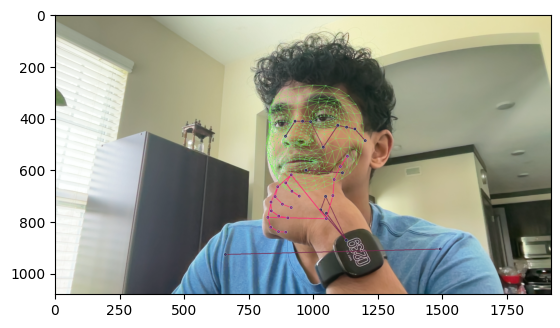

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

3. EXTRACT KEY POINTS

In [11]:
results.pose_landmarks

landmark {
  x: 0.53973639
  y: 0.475102276
  z: -1.10903919
  visibility: 0.999818563
}
landmark {
  x: 0.568906665
  y: 0.398082584
  z: -1.04780877
  visibility: 0.999753118
}
landmark {
  x: 0.586782753
  y: 0.403773695
  z: -1.04803872
  visibility: 0.999751568
}
landmark {
  x: 0.60334748
  y: 0.410246789
  z: -1.04782093
  visibility: 0.999707878
}
landmark {
  x: 0.514475524
  y: 0.384517372
  z: -1.03627717
  visibility: 0.999755
}
landmark {
  x: 0.498089522
  y: 0.382515252
  z: -1.03560209
  visibility: 0.999711812
}
landmark {
  x: 0.483232945
  y: 0.383239299
  z: -1.03612876
  visibility: 0.999701202
}
landmark {
  x: 0.62402606
  y: 0.452058822
  z: -0.618538678
  visibility: 0.999745727
}
landmark {
  x: 0.463866919
  y: 0.43703106
  z: -0.557930589
  visibility: 0.999803722
}
landmark {
  x: 0.57829392
  y: 0.566886425
  z: -0.942315042
  visibility: 0.999765396
}
landmark {
  x: 0.50517112
  y: 0.557723343
  z: -0.928343117
  visibility: 0.99985373
}
landmark {
  x: 

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

    return np.concatenate([pose,face,lh, rh])


last timestamp 31.20

In [14]:
result_test = extract_keypoints(results).shape

In [15]:
468*3+33*4+21*3+21*3

1662

In [16]:
np.save('0', result_test)

In [17]:
np.save('0',result_test)

4. SET UP FOLDERS FOR COLECTION

In [18]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 video worth of data
no_sequence = 30
# each video has 30 frames in it
sequence_length = 30

In [19]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(DATA_PATH,action, str(sequence)))
        except:
            pass

5. COLLECT KEY POINTS FOR TRININGS AND TESTING

In [ ]:
cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        #NEW LOOP
        # loop through actions
        for action in actions:
            # loop through sequeences(videos)
            for sequence in range(no_sequence):
                
                # loop through video length(sequence length)
                for frame_num in range(sequence_length):

                    # read the feed
                    ret, frame = cap.read()

                    # make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # draw landmarks
                    draw_styled_landmarks(image, results)

                    # NEW Apply wait logic
                    if frame_num == 0:
                        cv2.putText(image, 'starting collection', (120,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4,cv2.LINE_AA)
                        cv2.putText(image, 'collecting frames for {} video number {}'.format(action,sequence), (15,12), 
                                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0, 255), 4, cv2.LINE_AA)
                        
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image, 'collecting frames for {} video number {}'.format(action, sequence), (15,12), 
                                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,255), 4, cv2.LINE_AA)
                    
                    # new export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path,keypoints)

                    #show to screen
                    cv2.imshow('OpenCV feed', image)

                    # PRESS 'q' to quit
                    if cv2.waitKey(1) & 0xFF == ord('q'):
                        break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1176449016.py, line 24)

6. PREPROCESS DATA

7. BUILD AND TRAIN LSTM NEURAL NET

8. MAKE PREDICITIONS 

9. SAVE WEIGHTS

10. EVAL USING CONFUSION MATRIX AND ACCURACY

11. TEST